### Importing Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### Function to Read and Load .cfile Data

In [2]:
def getData(cfileName):
    """
    Given a name of a *.cfile, this function extracts the interleaved
    Inphase-Quadrature data samples and convert it into a numpy array of complex
    data elements. *.cfile format has interleaved I and Q samples where each sample
    is a float32 type. GNURadio Companion (GRC) scripts output data into a file
    though a file sink block in this format.
    Read more in SDR data types: https://github.com/miek/inspectrum
    """
    # Read the *.cfile which has each element in float32 format.
    data = np.fromfile(cfileName, dtype="float32")
    # Take each consecutive interleaved I sample and Q sample to create a single complex element.
    data = data[0::2] + 1j*data[1::2]
    #print("data type=", type(data))
    # Return the complex numpy array.
    return data

### Calculate RSSI

In [3]:
def calculate_rssi(complex_data):
    """
    Calculate RSSI as 10 * log10(I[k]^2 + Q[k]^2) for each sample.
    """
    # Separate I and Q data
    I = np.real(complex_data)
    Q = np.imag(complex_data)
    
    # Calculate RSSI for each sample
    rssi = 10 * np.log10(I**2 + Q**2)
    
    return rssi

### Plot RSSI function

In [4]:
def plot_rssi_vs_time(rssi, sample_rate):
    """
    Plot RSSI versus time.
    
    Parameters:
    - rssi: Array of RSSI values
    - sample_rate: Sampling rate of the data in Hz
    """
    # Adjust matplotlib settings to handle large data sets
    plt.rcParams['agg.path.chunksize'] = 10000  # Default is 0, meaning no limit
    plt.rcParams['path.simplify_threshold'] = 1.0  # Adjust the path simplification threshold

    # Calculate time vector based on the number of samples and sampling rate
    N = len(rssi)
    time = np.arange(N) / sample_rate
    print(N)
    print(time)
    # Plot RSSI vs Time
    plt.figure(figsize=(10, 6))
    plt.plot(time, rssi)
    plt.xlabel("Time (s)")
    # plt.xlim(1.5, 1.50001)
    plt.ylabel("RSSI (dB)")
    plt.title("RSSI vs Time")
    plt.grid(True)
    plt.show()

### Calculate IQ Magnitude

In [9]:
def calculate_IQMagnitude(complex_data):
    """
    Calculate RSSI as 10 * log10(I[k]^2 + Q[k]^2) for each sample.
    """
    # Separate I and Q data
    I = np.real(complex_data)
    Q = np.imag(complex_data)
    
    # Calculate RSSI for each sample
    magnitude = np.sqrt(I**2 + Q**2)
    
    return magnitude

### Plot IQ Magnitude

In [3]:
def plot_IQ_magnitude(complex_data):
    I = np.real(complex_data)
    Q = np.imag(complex_data)
    
    # Calculate RSSI for each sample
    magnitude = np.sqrt(I**2 + Q**2)
    plt.plot(magnitude, color='red')
    plt.title('IQ Magnitude Component')
    plt.xlabel('Sample Number')
    plt.ylabel('Magnitude')
    plt.legend()
    plt.show()

### Calculate SNR

In [7]:
def calculate_snr_mean_std(signal_complex_data, noise_complex_data):
    """
    Calculate SNR (Signal-to-Noise Ratio) using mean of the signal and standard deviation of the noise.
    
    SNR = 20 * log10(mean_signal_power / std_noise_power)
    
    signal_complex_data: array of complex numbers representing the signal
    noise_complex_data: array of complex numbers representing the noise
    """
    # Separate I and Q data for signal and noise
    I_signal = np.real(signal_complex_data)
    Q_signal = np.imag(signal_complex_data)
    
    I_noise = np.real(noise_complex_data)
    Q_noise = np.imag(noise_complex_data)
    
    # Calculate power of signal and noise
    signal_power = I_signal**2 + Q_signal**2
    noise_power = I_noise**2 + Q_noise**2
    
    # Calculate mean of the signal power and standard deviation of the noise power
    mean_signal_power = np.mean(signal_power)
    std_noise_power = np.std(noise_power)
    
    # Calculate SNR
    snr = 20 * np.log10(mean_signal_power / std_noise_power)
    
    return snr

### Plot SNR

In [8]:
def plot_snr(signal_complex_data, noise_complex_data):
    """
    Calculate SNR using mean/std method and plot the SNR values with samples on the x-axis.
    """
    # Calculate SNR for the given data
    snr_value = calculate_snr_mean_std(signal_complex_data, noise_complex_data)
    
    # Plot SNR
    plt.figure(figsize=(10, 6))
    plt.plot(np.arange(len(signal_complex_data)), snr_value * np.ones(len(signal_complex_data)), label=f'SNR: {snr_value:.2f} dB')
    plt.xlabel('Samples')
    plt.ylabel('SNR (dB)')
    plt.title('SNR vs Samples')
    plt.legend()
    plt.grid(True)
    plt.show()

### Plot I vs Q

In [7]:
def plot_I_vs_Q(complex_data):
    """
    Plot the in-phase (I) component against the quadrature (Q) component.
    
    I is on the x-axis and Q is on the y-axis.
    """
    # Separate I and Q data
    I = np.real(complex_data)
    Q = np.imag(complex_data)
    samples = np.arange(len(complex_data))
    
    # Plot I vs Q
    plt.figure(figsize=(8, 8))
    plt.scatter(I, Q, c='blue', marker='o', alpha=0.5)
    plt.xlabel('In-Phase (I)')
    plt.ylabel('Quadrature (Q)')
    plt.title('I vs Q Plot')
    plt.grid(True)
    plt.axhline(0, color='black', linewidth=0.5)
    plt.axvline(0, color='black', linewidth=0.5)
    plt.show()

    # fig = plt.figure(figsize = (10, 7))
    # ax = plt.axes(projection ="3d")
    
    # # Creating plot
    # ax.scatter3D(I, Q, samples, color = "green")
    # plt.title("simple 3D scatter plot")
    
    # # show plot
    # plt.show()

### Reading and Loading a .cfile to Numpy Array

In [3]:
dataWithOutLoRa = getData("./without-lora-Fc-435MHz-Fs-20MHz.cfile")
dataWithLoRa = getData("./with-lora-Fc-435MHz-Fs-20MHz.cfile")


In [ ]:
dataWithOutInterference = getData("./WithLora.cfile")
dataWithInterference = getData("./WithInterferenceLora.cfile")

### Plot RSSI

In [18]:
dataWithLoRarssi = calculate_rssi(dataWithOutLoRa)
dataWithOutLoRaRssi = calculate_rssi(dataWithLoRa)

NameError: name 'dataWithOutLoRa' is not defined

79403816
[0.00000000e+00 5.00000000e-08 1.00000000e-07 ... 3.97019065e+00
 3.97019070e+00 3.97019075e+00]


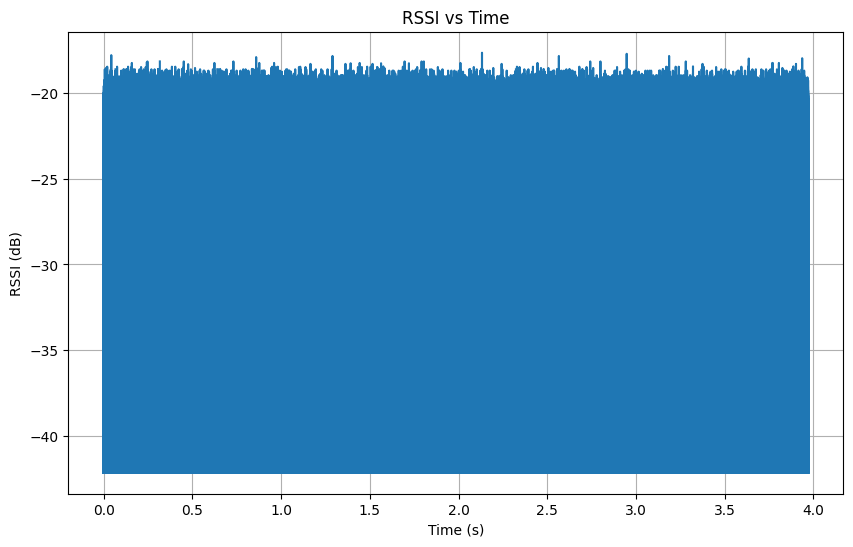

In [7]:
sample_rate = 20e6
plot_rssi_vs_time(dataWithLoRarssi, sample_rate)

87443264
[0.00000000e+00 5.00000000e-08 1.00000000e-07 ... 4.37216305e+00
 4.37216310e+00 4.37216315e+00]


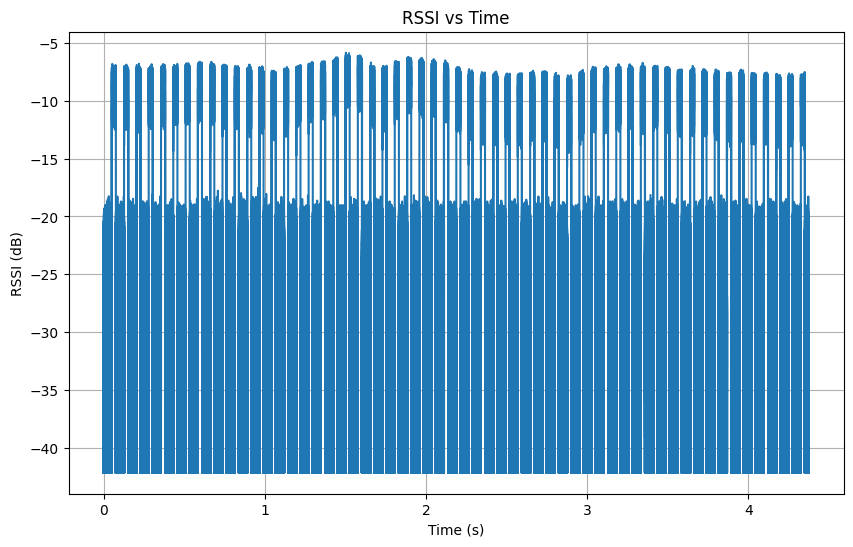

In [8]:
sample_rate = 20e6
plot_rssi_vs_time(dataWithOutLoRaRssi, sample_rate)

### Plot I/Q ( in-phase and quadrature)

C:\Users\Sanduni\AppData\Local\Temp\ipykernel_23988\3978421408.py:17: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
C:\Users\Sanduni\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


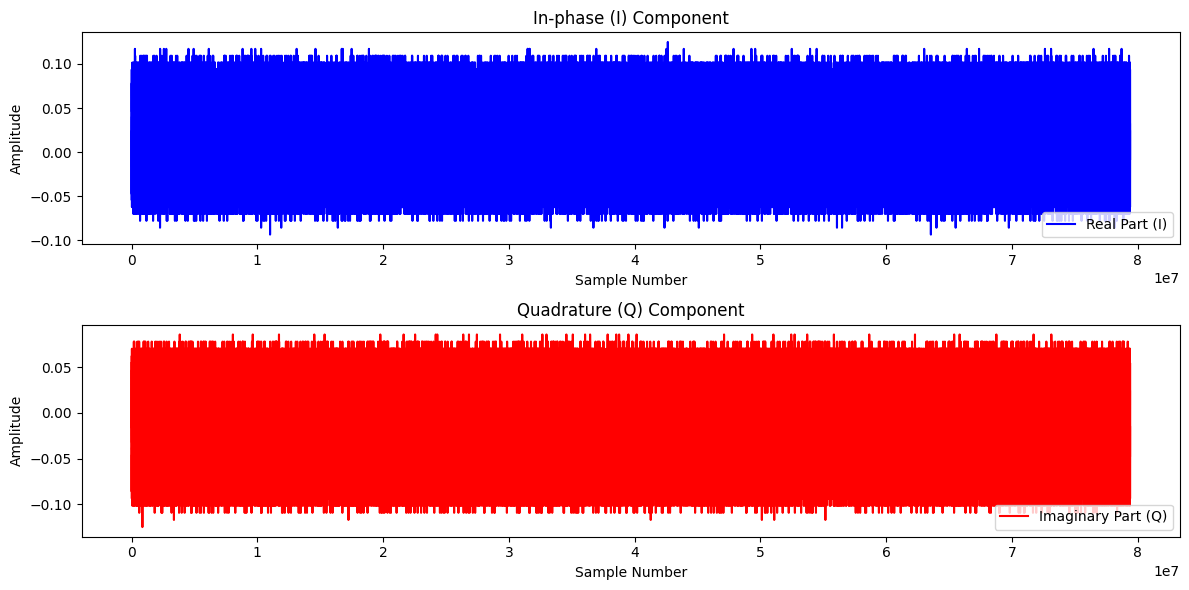

In [9]:
plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 1)
plt.plot(np.real(dataWithOutLoRa), label='Real Part (I)', color='blue')
plt.title('In-phase (I) Component')
plt.xlabel('Sample Number')
plt.ylabel('Amplitude')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(np.imag(dataWithOutLoRa), label='Imaginary Part (Q)', color='red')
plt.title('Quadrature (Q) Component')
plt.xlabel('Sample Number')
plt.ylabel('Amplitude')
plt.legend()

plt.tight_layout()
plt.show()

C:\Users\Sanduni\AppData\Local\Temp\ipykernel_23988\526822832.py:17: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()


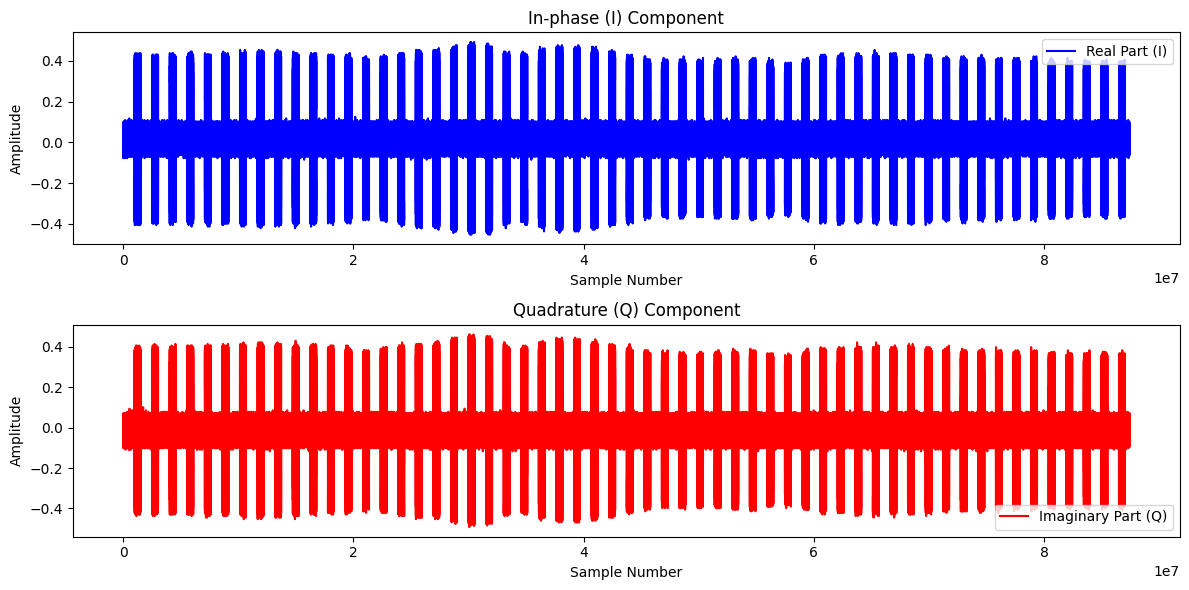

In [10]:
plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 1)
plt.plot(np.real(dataWithLoRa), label='Real Part (I)', color='blue')
plt.title('In-phase (I) Component')
plt.xlabel('Sample Number')
plt.ylabel('Amplitude')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(np.imag(dataWithLoRa), label='Imaginary Part (Q)', color='red')
plt.title('Quadrature (Q) Component')
plt.xlabel('Sample Number')
plt.ylabel('Amplitude')
plt.legend()

plt.tight_layout()
plt.show()

C:\Users\Sanduni\AppData\Local\Temp\ipykernel_6352\1677127246.py:17: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
C:\Users\Sanduni\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


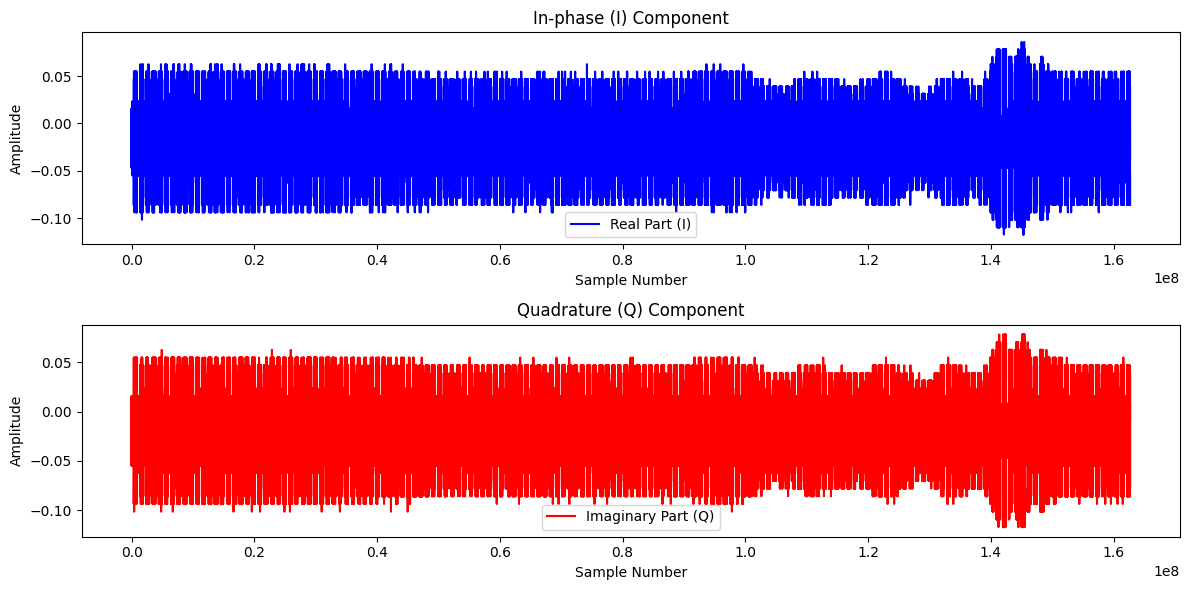

In [5]:
plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 1)
plt.plot(np.real(dataWithOutInterference), label='Real Part (I)', color='blue')
plt.title('In-phase (I) Component')
plt.xlabel('Sample Number')
plt.ylabel('Amplitude')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(np.imag(dataWithOutInterference), label='Imaginary Part (Q)', color='red')
plt.title('Quadrature (Q) Component')
plt.xlabel('Sample Number')
plt.ylabel('Amplitude')
plt.legend()

plt.tight_layout()
plt.show()

C:\Users\Sanduni\AppData\Local\Temp\ipykernel_6352\2837844939.py:17: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()


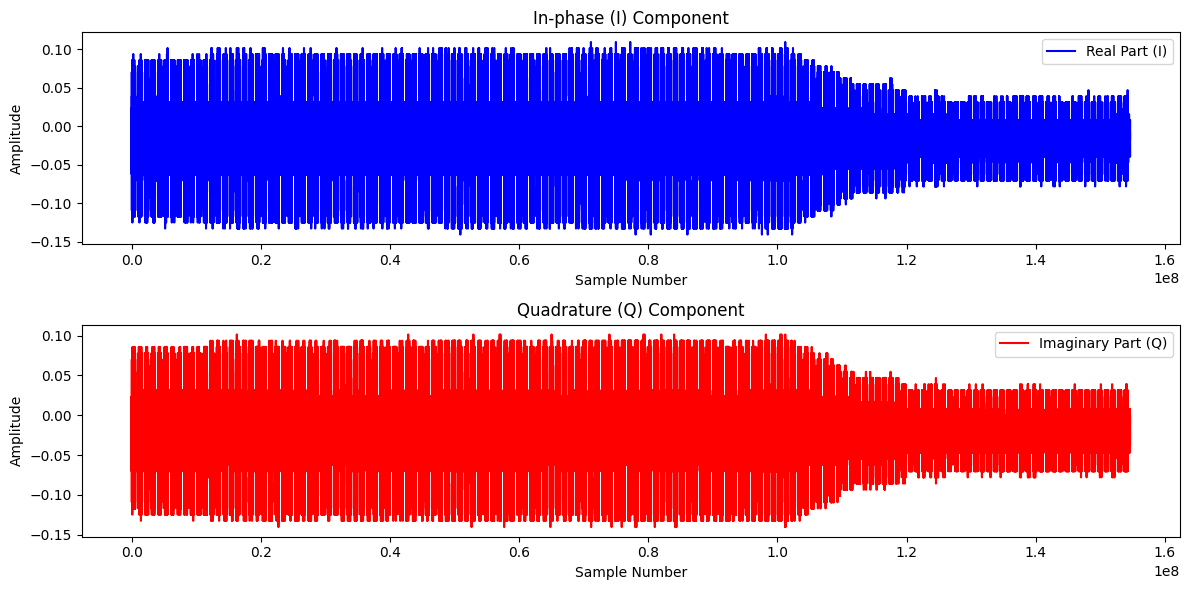

In [6]:
plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 1)
plt.plot(np.real(dataWithInterference), label='Real Part (I)', color='blue')
plt.title('In-phase (I) Component')
plt.xlabel('Sample Number')
plt.ylabel('Amplitude')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(np.imag(dataWithInterference), label='Imaginary Part (Q)', color='red')
plt.title('Quadrature (Q) Component')
plt.xlabel('Sample Number')
plt.ylabel('Amplitude')
plt.legend()

plt.tight_layout()
plt.show()

C:\Users\Sanduni\AppData\Roaming\Python\Python311\site-packages\IPython\core\events.py:82: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
C:\Users\Sanduni\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


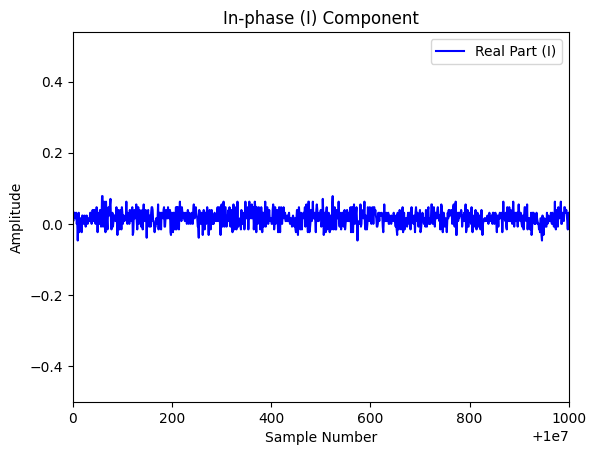

In [5]:
plt.plot(np.real(dataWithLoRa), label='Real Part (I)', color='blue')
plt.xlim(1e7, 1.0001e7)
plt.title('In-phase (I) Component')
plt.xlabel('Sample Number')
plt.ylabel('Amplitude')
plt.legend()

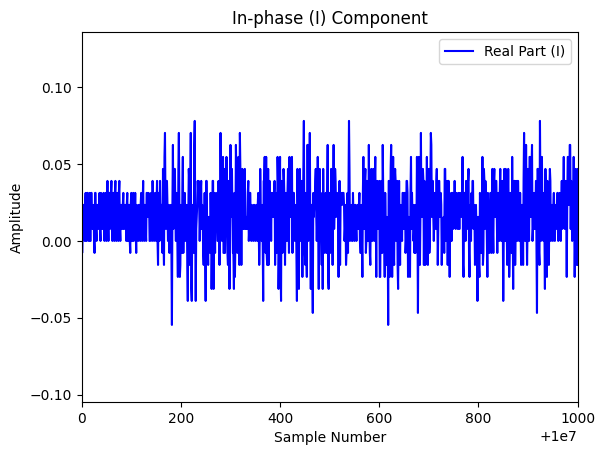

In [6]:
plt.plot(np.real(dataWithOutLoRa), label='Real Part (I)', color='blue')
plt.xlim(1e7, 1.0001e7)
plt.title('In-phase (I) Component')
plt.xlabel('Sample Number')
plt.ylabel('Amplitude')
plt.legend()

C:\Users\Sanduni\AppData\Local\Temp\ipykernel_8760\3802027834.py:11: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


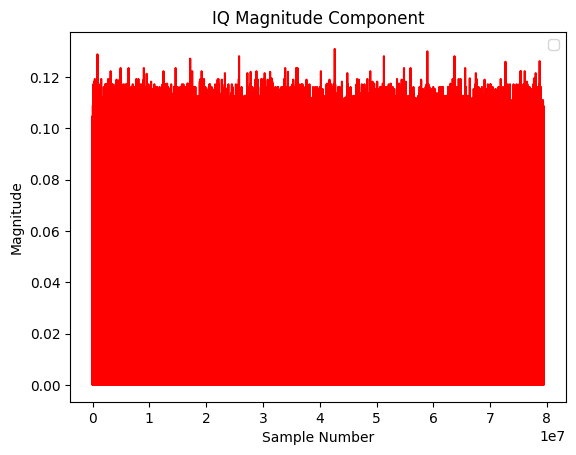

In [15]:
plot_IQ_magnitude(dataWithOutLoRa)

C:\Users\Sanduni\AppData\Local\Temp\ipykernel_8760\3802027834.py:11: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


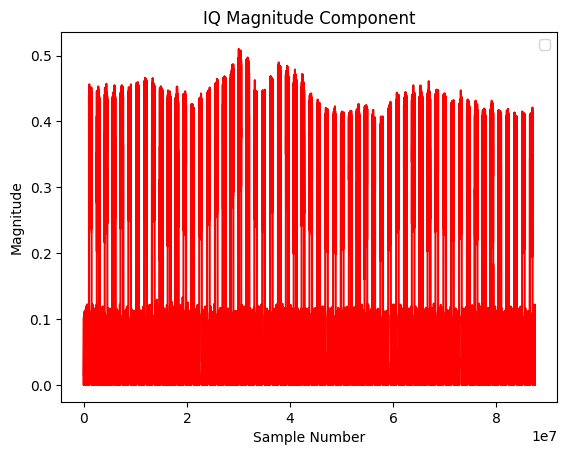

In [16]:
plot_IQ_magnitude(dataWithLoRa)

C:\Users\Sanduni\AppData\Local\Temp\ipykernel_26480\3802027834.py:11: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()
C:\Users\Sanduni\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


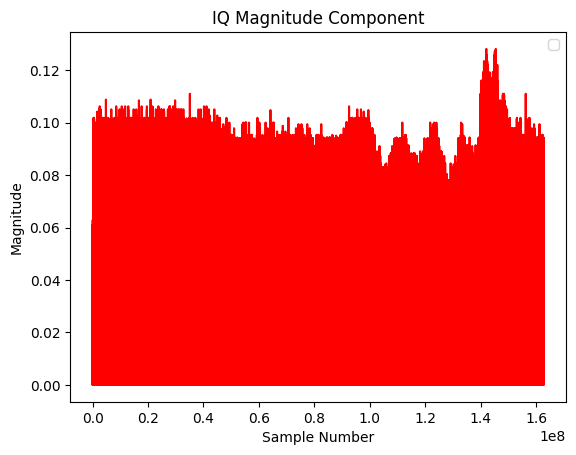

In [5]:
plot_IQ_magnitude(dataWithOutInterference)

C:\Users\Sanduni\AppData\Local\Temp\ipykernel_26480\3802027834.py:11: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


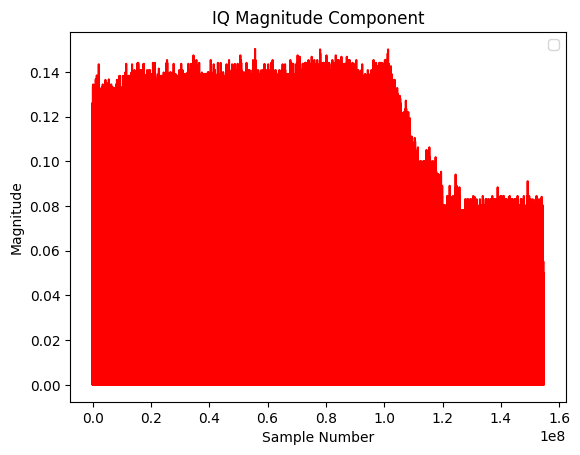

In [6]:
plot_IQ_magnitude(dataWithInterference)

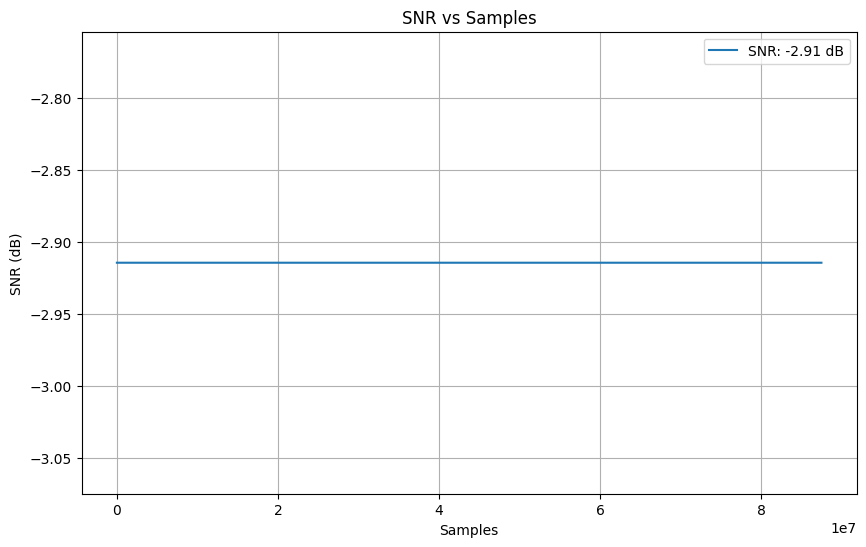

In [9]:
plot_snr(dataWithLoRa, dataWithLoRa)

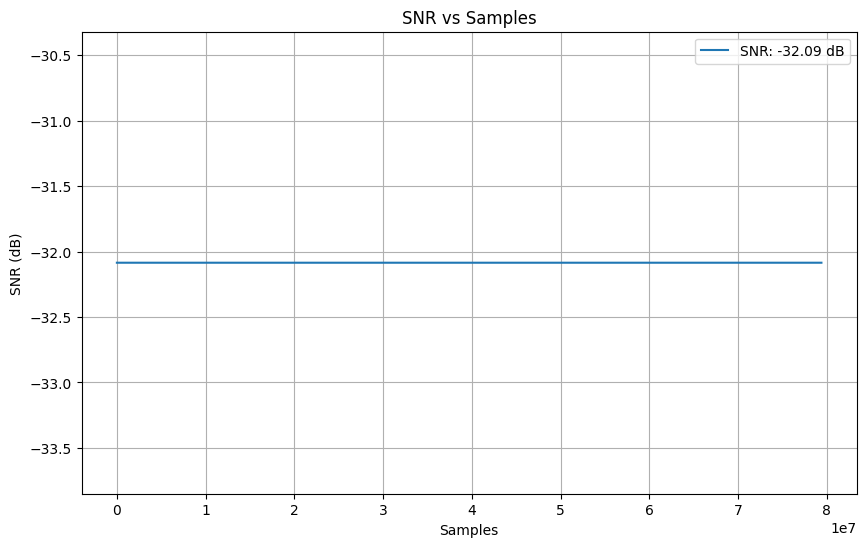

In [10]:
plot_snr(dataWithOutLoRa, dataWithOutLoRa)

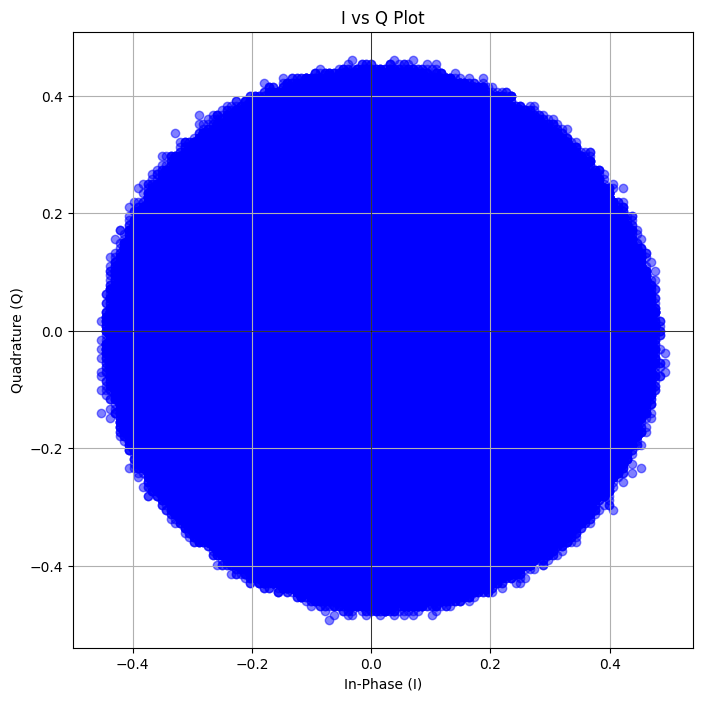

In [8]:
plot_I_vs_Q(dataWithLoRa)

### Magnitude of Complex IQ data Plot

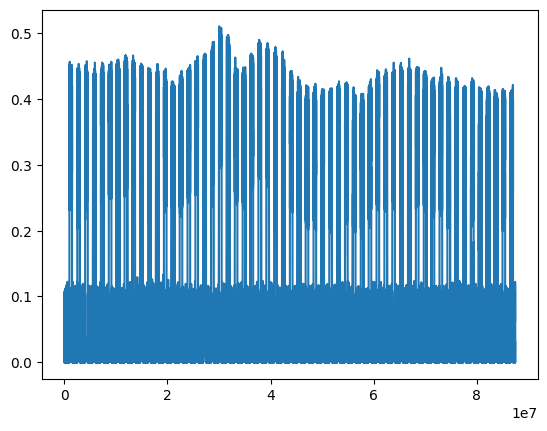

In [5]:
# combined = I + 1j * Q
plt.plot(np.abs(dataWithLoRa))
plt.show()

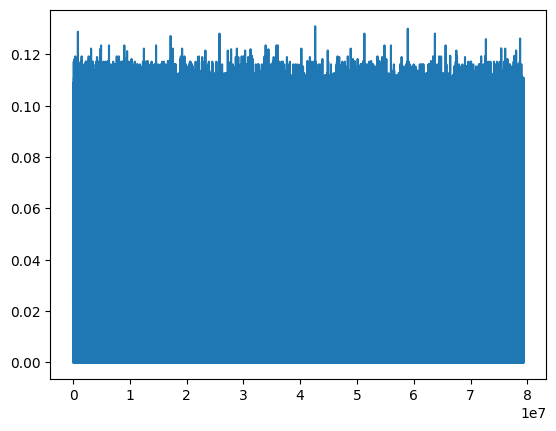

In [6]:
plt.plot(np.abs(dataWithOutLoRa))
plt.show()

### Plotting Power Spectral Density (PSD)

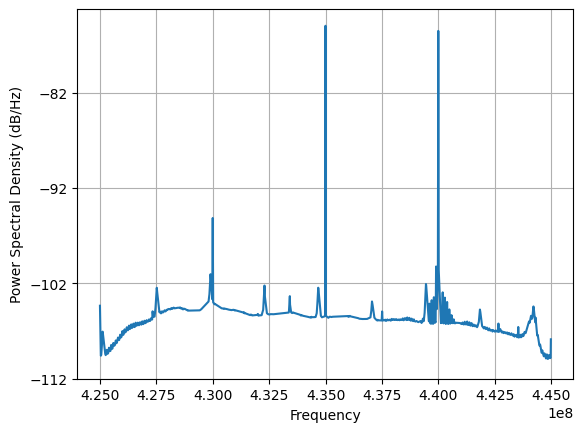

In [11]:
fig = plt.figure()
plt.psd(dataWithOutLoRa, NFFT=2048, Fc=435e6, Fs=20e6)
#plt.xlim(4326, 434e6)
plt.show()

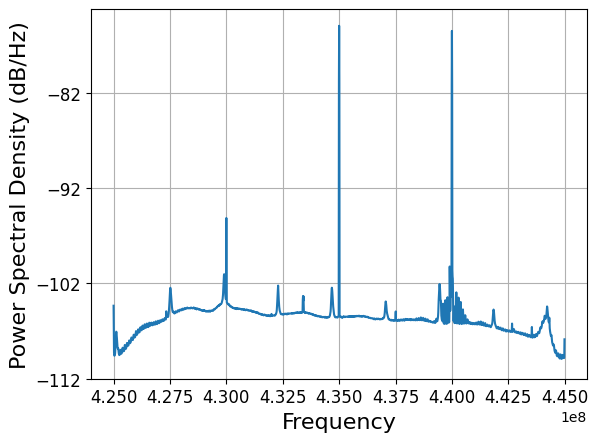

In [4]:
fig = plt.figure()
plt.psd(dataWithOutLoRa, NFFT=2048, Fc=435e6, Fs=20e6)
plt.xlabel("Frequency", size= 16)
plt.ylabel("Power Spectral Density (dB/Hz)", size= 16)
plt.yticks(size=12)
plt.xticks(size=12)
#plt.xlim(4326, 434e6)
plt.show()

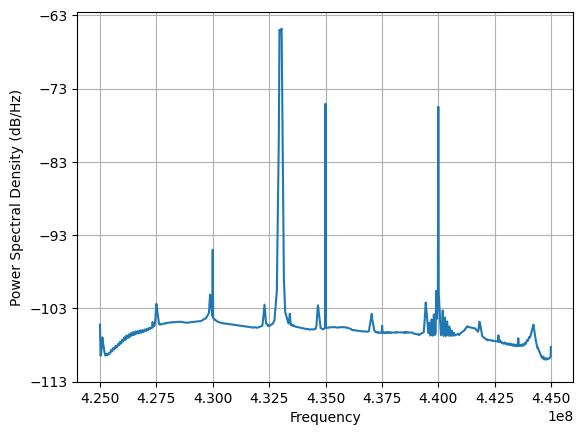

In [12]:
fig = plt.figure()
plt.psd(dataWithLoRa, NFFT=2048, Fc=435e6, Fs=20e6)
#plt.xlim(432e6, 434e6)
plt.show()

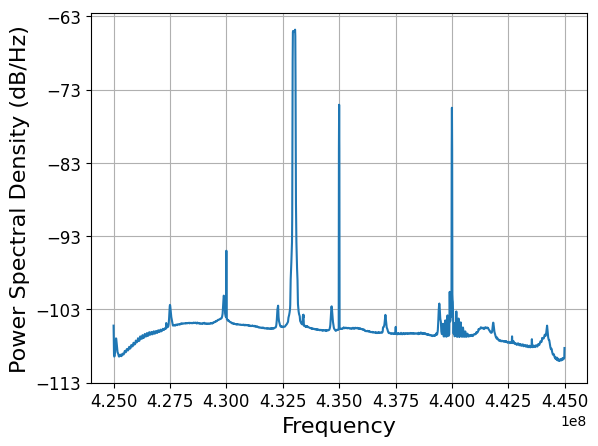

In [5]:
fig = plt.figure()
plt.psd(dataWithLoRa, NFFT=2048, Fc=435e6, Fs=20e6)
#plt.xlim(432e6, 434e6)
plt.xlabel("Frequency", size= 16)
plt.ylabel("Power Spectral Density (dB/Hz)", size= 16)
plt.yticks(size=12)
plt.xticks(size=12)
plt.show()

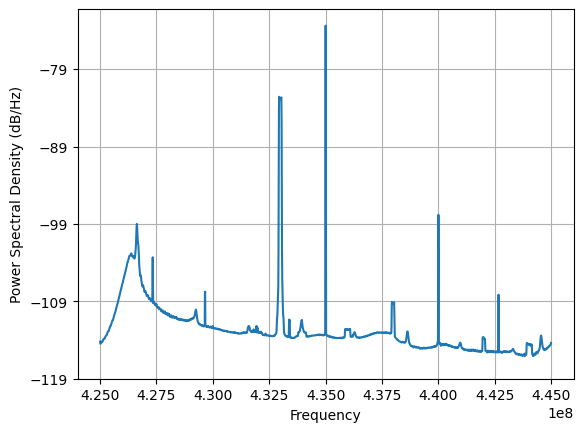

In [20]:
fig = plt.figure()
plt.psd(dataWithOutInterference, NFFT=2048, Fc=435e6, Fs=20e6)
#plt.xlim(432e6, 434e6)
plt.show()

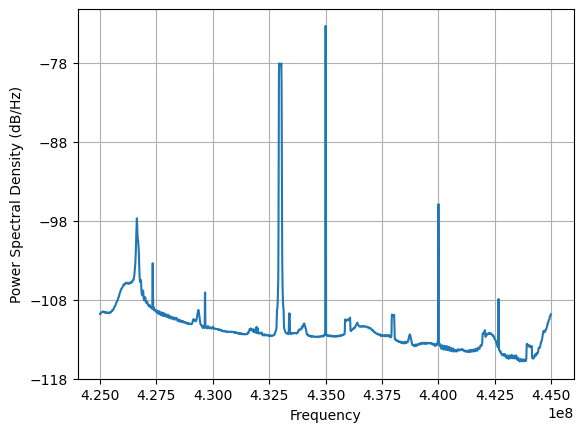

In [21]:
fig = plt.figure()
plt.psd(dataWithInterference, NFFT=2048, Fc=435e6, Fs=20e6)
#plt.xlim(432e6, 434e6)
plt.show()

### Plotting Spectrogram

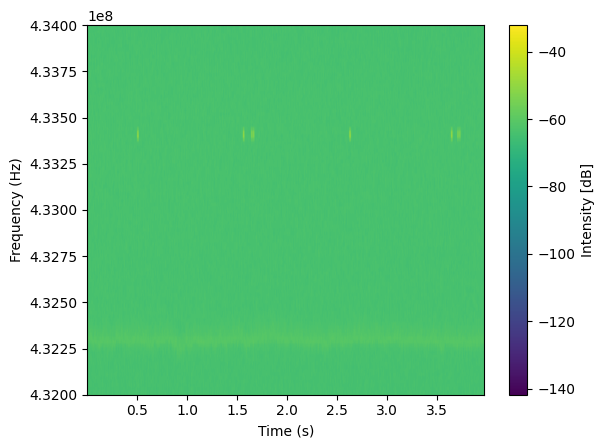

In [ ]:
fig = plt.figure()
pxx, freq, t, cax = plt.specgram(dataWithOutLoRa, NFFT=1024, Fs=20e6, Fc=435e6, mode='magnitude')
fig.colorbar(cax).set_label('Intensity [dB]')
plt.xlabel("Time (s)", size= 16)
plt.ylabel("Frequency (Hz)", size= 16)
plt.yticks(size=12)
plt.xticks(size=12)
plt.ylim(432e6, 434e6)
plt.show()

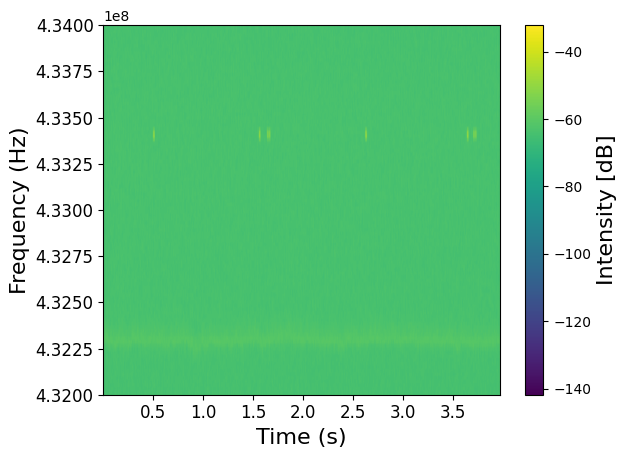

In [7]:
fig = plt.figure()
pxx, freq, t, cax = plt.specgram(dataWithOutLoRa, NFFT=1024, Fs=20e6, Fc=435e6, mode='magnitude')
fig.colorbar(cax).set_label('Intensity [dB]', size= 16)
plt.xlabel("Time (s)", size= 16)
plt.ylabel("Frequency (Hz)", size= 16)
plt.yticks(size=12)
plt.xticks(size=12)
plt.ylim(432e6, 434e6)
plt.show()

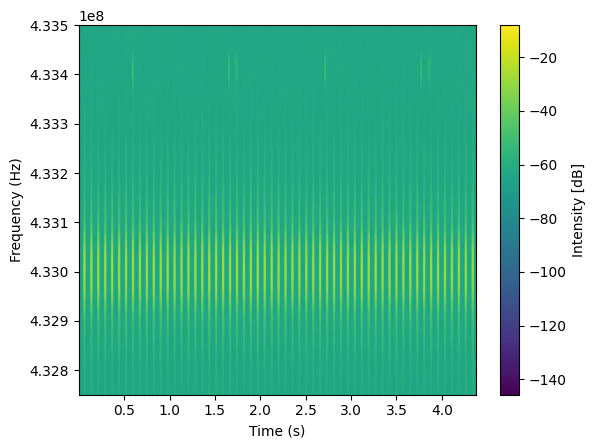

In [14]:
fig = plt.figure()
pxx, freq, t, cax = plt.specgram(dataWithLoRa, NFFT=1024, Fs=20e6, Fc=435e6, mode='magnitude')
fig.colorbar(cax).set_label('Intensity [dB]')
plt.xlabel("Time (s)")
plt.ylabel("Frequency (Hz)")
plt.ylim(432.75e6, 433.5e6)
plt.show()

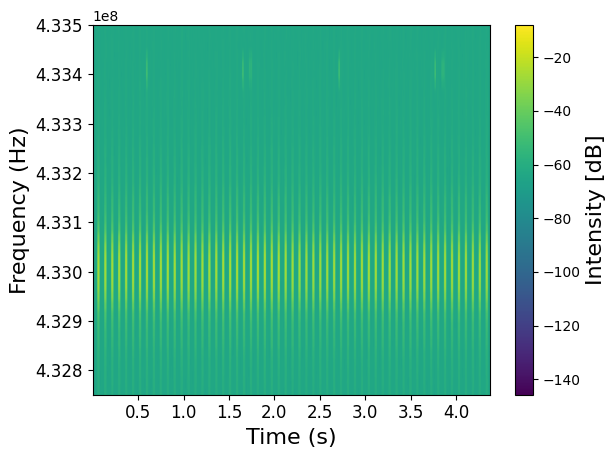

In [8]:
fig = plt.figure()
pxx, freq, t, cax = plt.specgram(dataWithLoRa, NFFT=1024, Fs=20e6, Fc=435e6, mode='magnitude')
fig.colorbar(cax).set_label('Intensity [dB]', size= 16)
plt.xlabel("Time (s)", size= 16)
plt.ylabel("Frequency (Hz)", size= 16)
plt.ylim(432.75e6, 433.5e6)
plt.yticks(size=12)
plt.xticks(size=12)
plt.show()

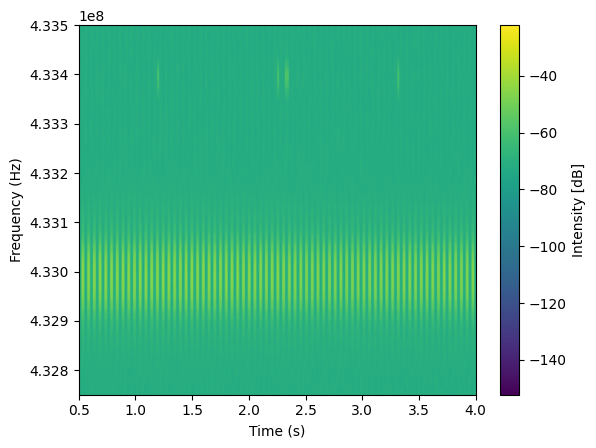

In [28]:
fig = plt.figure()
pxx, freq, t, cax = plt.specgram(dataWithOutInterference, NFFT=1024, Fs=20e6, Fc=435e6, mode='magnitude')
fig.colorbar(cax).set_label('Intensity [dB]')
plt.xlabel("Time (s)")
plt.ylabel("Frequency (Hz)")
plt.ylim(432.75e6, 433.5e6)
plt.xlim(0.5, 4)
plt.show()

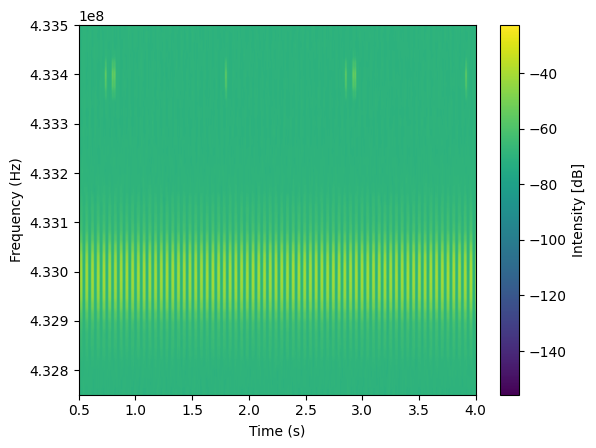

In [27]:
fig = plt.figure()
pxx, freq, t, cax = plt.specgram(dataWithInterference, NFFT=1024, Fs=20e6, Fc=435e6, mode='magnitude')
fig.colorbar(cax).set_label('Intensity [dB]')
plt.xlabel("Time (s)")
plt.ylabel("Frequency (Hz)")
plt.ylim(432.75e6, 433.5e6)
plt.xlim(0.5, 4)
plt.show()

### Plotting FFT

### Deleting Variable to Save Memory

In [10]:
del dataWithLoRa

In [11]:
del dataWithOutLoRa